# **Retail Customer Analysis** <br>





## Purpose

This report is an analysis of the [Online Retail II Dataset found on the University of California Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Online+Retail+II) in order analyze the current state of the business, how we are retaining our customers and clustering our customers into High-Value, Mid-Value, and Low-Value categories in order to improve marketing efforts. <br>

We will be creating a **classification model** in order to predict in the future if a customer will be High-Value, Mid-Value, or Low-Value. 

The **hypothesis** that we will be testing will be to analyze if certain products are being purchased by certain customer groups. For example, High-Value customers are purchasing certain products that can be then marketed to Mid-Value and Low-Value customers in order to increase the revenue.

**Null Hypothesis**: Product purchased (description) has no an effect on customer groups. 

**Alternate Hypothesis**: Product purchased (description) does have an effect on customer groups. 

**Interest In The Dataset**: <br>
Personally, I am interested retail businesses and in customer behavior. I believe marketing efforts can be improved in many organizations by marketing to the right customers and in order to provide value to them based on their needs. 

**Context On The Data**: <br>
The dataset consists of transactional data with customers in 41 different countries who make purchases from an online retail company based in the United Kingdom (UK) that sells unique all-occasion gifts


1) Data Collection & Cleaning<br>
2) Exploratory Analysis<br>
4) Customer Segmentation - RFM Analysis <br>
5) Modeling: Classification<br>
6) Product Description & Customer Segment Analysis  <br>
7) Conclusion<br>



## 1 - Data Collection & Cleaning 

Steps taken here were to load the dataset and applicable packages into the notebook and perform some cleaning in order to conduct a smooth analysis. 

Findings in this section would be: 
- Our dataset contains 1,067,371 rows. 
- Key information that is included would be Date of Purchase, CustomerIDs, Country, Price, Quantity, and the product that was purchased. 

Key Cleaning completed: 
- Removing **negative values** due to cancelled purchases. 
- Limiting the data to 2010 & 2011 as it also included a single month of 2009.
- Data for 2011 is up to December 12th, 2011
- Removing **duplicate and null** values. 
- Creating a Revenue column. 
- Converting date values into datetimeindex objects and creating columns with year and months. 

In [1]:
# Import Standard packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta,date


In [2]:
# Load the available data and overview
import pandas as pd
df = pd.read_csv("online_retail_II.csv")

### Intial Dataset: 

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# Quick descriptive statistics on the data set
df.describe()


,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [5]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

### Column Descriptions

**InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. <br>

**StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.<br>

**Description**: Product (item) name. Nominal.<br>

**Quantity**: The quantities of each product (item) per transaction. Numeric.<br>

**InvoiceDate**: Invice date and time. Numeric. The day and time when a transaction was generated.<br>

**UnitPrice**: Unit price. Numeric. Product price per unit in sterling (Â£).<br>

**CustomerID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.<br>

**Country**: Country name. Nominal. The name of the country where a customer resides.<br>



**Findings**

* There are cancelled items recognized by the invoice number.
* Revenue may be determined via Quantity * Unit Price
* Countries may be used to determine operations outside of UK. 
* Remove space in 'Customer ID' column


In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [8]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

There are 4382 missing descriptions, but that won't have an impact
There are 243007 missing Customer Id values, but we assume that each missing CustomerID represents a new customer. This would mean that the missing Customer ID values are unique to the dataset. 
InvoiceData is an object and needs to be set to a date. Can also create invoice Month and Invoice Year.


## Column Name Creation

In [9]:
df['Revenue'] = df['Price'] * df['Quantity']
df['InvoiceDate'] = pd.DatetimeIndex(df['InvoiceDate']).date
df['InvoiceMonth'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['InvoiceYear'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['InvoiceYearMonth']  = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df.rename(columns={'Customer ID':'CustomerID'}, inplace=True)
df['Quantity'] = df['Quantity'].astype('float')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear,InvoiceYearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01,6.95,13085.0,United Kingdom,83.4,12,2009,200912
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01,6.75,13085.0,United Kingdom,81.0,12,2009,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01,6.75,13085.0,United Kingdom,81.0,12,2009,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01,2.10,13085.0,United Kingdom,100.8,12,2009,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01,1.25,13085.0,United Kingdom,30.0,12,2009,200912


In [10]:
#re-oder columns for readability

df = df[['Invoice','StockCode','InvoiceDate','InvoiceMonth','InvoiceYear','InvoiceYearMonth','CustomerID','Country','Description','Quantity','Price','Revenue']]
df.head()

,Invoice,StockCode,InvoiceDate,InvoiceMonth,InvoiceYear,InvoiceYearMonth,CustomerID,Country,Description,Quantity,Price,Revenue
0,489434,85048,2009-12-01,12,2009,200912,13085.0,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,6.95,83.4
1,489434,79323P,2009-12-01,12,2009,200912,13085.0,United Kingdom,PINK CHERRY LIGHTS,12.0,6.75,81.0
2,489434,79323W,2009-12-01,12,2009,200912,13085.0,United Kingdom,WHITE CHERRY LIGHTS,12.0,6.75,81.0
3,489434,22041,2009-12-01,12,2009,200912,13085.0,United Kingdom,"RECORD FRAME 7"" SINGLE SIZE",48.0,2.10,100.8
4,489434,21232,2009-12-01,12,2009,200912,13085.0,United Kingdom,STRAWBERRY CERAMIC TRINKET BOX,24.0,1.25,30.0


## Duplicate Check

In [11]:
#check for duplicates 
df_duplicates = df[df.duplicated(subset = ['Invoice', 'StockCode','Description','Quantity','InvoiceDate','Price','CustomerID','Country'],keep = False)]
df_duplicates.sort_values(by = ['InvoiceDate','Description','StockCode']).head(20)

,Invoice,StockCode,InvoiceDate,InvoiceMonth,InvoiceYear,InvoiceYearMonth,CustomerID,Country,Description,Quantity,Price,Revenue
1172,489556,20977,2009-12-01,12,2009,200912,15719.0,United Kingdom,36 PENCILS TUBE WOODLAND,2.0,1.25,2.50
1173,489556,20977,2009-12-01,12,2009,200912,15719.0,United Kingdom,36 PENCILS TUBE WOODLAND,2.0,1.25,2.50
716,489533,84946,2009-12-01,12,2009,200912,16011.0,United Kingdom,ANTIQUE SILVER TEA GLASS ETCHED,6.0,1.25,7.50
725,489533,84946,2009-12-01,12,2009,200912,16011.0,United Kingdom,ANTIQUE SILVER TEA GLASS ETCHED,6.0,1.25,7.50
784,489536,17164D,2009-12-01,12,2009,200912,16393.0,United Kingdom,ASS COL SMALL SAND FROG P'WEIGHT,1.0,0.42,0.42
808,489536,17164D,2009-12-01,12,2009,200912,16393.0,United Kingdom,ASS COL SMALL SAND FROG P'WEIGHT,1.0,0.42,0.42
816,489536,21650,2009-12-01,12,2009,200912,16393.0,United Kingdom,ASSORTED TUTTI FRUTTI BRACELET,1.0,0.65,0.65
820,489536,21650,2009-12-01,12,2009,200912,16393.0,United Kingdom,ASSORTED TUTTI FRUTTI BRACELET,1.0,0.65,0.65
1842,489594,22062,2009-12-01,12,2009,200912,15005.0,United Kingdom,CERAMIC BOWL WITH LOVE HEART DESIGN,1.0,2.95,2.95
1854,489594,22062,2009-12-01,12,2009,200912,15005.0,United Kingdom,CERAMIC BOWL WITH LOVE HEART DESIGN,1.0,2.95,2.95


In [12]:
df_duplicates.count() # lots of duplicate values

Invoice             67246
StockCode           67246
InvoiceDate         67246
InvoiceMonth        67246
InvoiceYear         67246
InvoiceYearMonth    67246
CustomerID          51544
Country             67246
Description         67032
Quantity            67246
Price               67246
Revenue             67246
dtype: int64

In [13]:
#dropping duplicates 
df = df.drop_duplicates(subset = ['Invoice', 'StockCode','Description','Quantity','InvoiceDate','Price','CustomerID','Country'])

In [14]:
df.shape[0]

1033034

Dropped a total of 34,337 rows of duplicate values based on the subset of Invoice, StockCode, Description, Quantity, InvoiceDate, Price, CustomerID, and Country. 

In [15]:
#deleting missing values

df = df.dropna(subset=['Invoice','CustomerID'],how='any')


In [16]:
df.shape[0]

797883

## Date Range Limitation

In [17]:
df.sort_values(by = 'InvoiceDate').head()

,Invoice,StockCode,InvoiceDate,InvoiceMonth,InvoiceYear,InvoiceYearMonth,CustomerID,Country,Description,Quantity,Price,Revenue
0,489434,85048,2009-12-01,12,2009,200912,13085.0,United Kingdom,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,6.95,83.40
1615,489574,21554,2009-12-01,12,2009,200912,13097.0,United Kingdom,CERAMIC BIRDHOUSE RED ROOF LARGE,1.0,5.95,5.95
1614,489574,21553,2009-12-01,12,2009,200912,13097.0,United Kingdom,CERAMIC BIRDHOUSE FINCH BLUE LARGE,1.0,5.95,5.95
1613,489574,21534,2009-12-01,12,2009,200912,13097.0,United Kingdom,DAIRY MAID LARGE MILK JUG,3.0,4.95,14.85
1612,489574,21547,2009-12-01,12,2009,200912,13097.0,United Kingdom,CERAMIC BIRDHOUSE CRESTED TIT SMALL,1.0,2.95,2.95


In [18]:
df.tail()

,Invoice,StockCode,InvoiceDate,InvoiceMonth,InvoiceYear,InvoiceYearMonth,CustomerID,Country,Description,Quantity,Price,Revenue
1067366,581587,22899,2011-12-09,12,2011,201112,12680.0,France,CHILDREN'S APRON DOLLY GIRL,6.0,2.10,12.60
1067367,581587,23254,2011-12-09,12,2011,201112,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,4.0,4.15,16.60
1067368,581587,23255,2011-12-09,12,2011,201112,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,4.0,4.15,16.60
1067369,581587,22138,2011-12-09,12,2011,201112,12680.0,France,BAKING SET 9 PIECE RETROSPOT,3.0,4.95,14.85
1067370,581587,POST,2011-12-09,12,2011,201112,12680.0,France,POSTAGE,1.0,18.00,18.00


Data starts : December 1st, 2009 <br>
Data ends: December 9th, 2011

Limit data to 2010 and 2011 only

In [19]:
start_date = '2009'
start_date=np.int64(start_date)
type(start_date)

numpy.int64

In [20]:
df = df[(df['InvoiceYear']>start_date)]
df.sort_values(by = 'InvoiceDate').head()

,Invoice,StockCode,InvoiceDate,InvoiceMonth,InvoiceYear,InvoiceYearMonth,CustomerID,Country,Description,Quantity,Price,Revenue
45228,493410,TEST001,2010-01-04,1,2010,201001,12346.0,United Kingdom,This is a test product.,5.0,4.50,22.50
45650,C493445,84659A,2010-01-04,1,2010,201001,16296.0,United Kingdom,WHITE TRAVEL ALARM CLOCK,-1.0,2.55,-2.55
45651,C493445,21343,2010-01-04,1,2010,201001,16296.0,United Kingdom,GOLD JEWELERY BOX,-2.0,16.95,-33.90
45652,C493445,21314,2010-01-04,1,2010,201001,16296.0,United Kingdom,SMALL GLASS HEART TRINKET POT,-1.0,2.10,-2.10
45653,C493445,85123A,2010-01-04,1,2010,201001,16296.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,-2.0,2.95,-5.90


## Removing Negative Values

In [21]:
df= df[df.Quantity>0]

In [22]:
len(df)

749215

## Removing Test Values

In [23]:
df=df[~df.StockCode.str.contains('TEST')]

### Dataset after cleaning: 

In [24]:
df.head()

,Invoice,StockCode,InvoiceDate,InvoiceMonth,InvoiceYear,InvoiceYearMonth,CustomerID,Country,Description,Quantity,Price,Revenue
45234,493414,21844,2010-01-04,1,2010,201001,14590.0,United Kingdom,RETRO SPOT MUG,36.0,2.55,91.8
45235,493414,21533,2010-01-04,1,2010,201001,14590.0,United Kingdom,RETRO SPOT LARGE MILK JUG,12.0,4.25,51.0
45236,493414,37508,2010-01-04,1,2010,201001,14590.0,United Kingdom,NEW ENGLAND CERAMIC CAKE SERVER,2.0,2.55,5.1
45237,493414,35001G,2010-01-04,1,2010,201001,14590.0,United Kingdom,HAND OPEN SHAPE GOLD,2.0,4.25,8.5
45238,493414,21527,2010-01-04,1,2010,201001,14590.0,United Kingdom,RETRO SPOT TRADITIONAL TEAPOT,12.0,6.95,83.4


# 2 - Data Exploration

### Now that we have cleaned the data we will explore the current state of the business focusing on Revenue, Items Sold, and Total Number of Customers in 2010 and 2011. 

In [25]:
df.shape

(749208, 12)

#### Now that we have completed our cleaning we are left with just under 750,000 rows and 12 columns. 

In [26]:
df.describe()

,InvoiceMonth,InvoiceYear,InvoiceYearMonth,CustomerID,Quantity,Price,Revenue
count,749208.000000,749208.000000,749208.000000,749208.000000,749208.000000,749208.000000,749208.000000
mean,7.231945,2010.489929,201056.224881,15314.097184,13.520891,3.218652,22.278438
std,3.361919,0.499899,50.163778,1696.641625,148.906242,30.213072,231.620878
min,1.000000,2010.000000,201001.000000,12346.000000,1.000000,0.000000,0.000000
25%,4.000000,2010.000000,201007.000000,13969.000000,2.000000,1.250000,4.950000
50%,8.000000,2010.000000,201012.000000,15228.000000,6.000000,1.950000,12.480000
75%,10.000000,2011.000000,201108.000000,16791.000000,12.000000,3.750000,19.800000
max,12.000000,2011.000000,201112.000000,18287.000000,80995.000000,10953.500000,168469.600000




#### Some importanat metrics to highlight are **Quantity, Price, and Revenue**. 

Mean of Quantity = 13.52<br>
Mean of Price = \\$3.21<br>
Std. Dev of Quanity = 148.90<br>
Std. Dev of Price = \\$30.21<br>

## Yearly Revenue

### How much money are we making each year? 
For this analysis we will be focusing on Revenue as it is assumed that the goal of the business is Revenue. 


In [27]:
## Yearly Revenue
df_revenue_yearly = df.groupby(['InvoiceYear',])['Revenue'].sum().reset_index()
df_revenue_yearly = df_revenue_yearly.sort_values(by = 'Revenue', ascending = False)
df_revenue_yearly = round(df_revenue_yearly,2)
df_revenue_yearly

,InvoiceYear,Revenue
0,2010,8374383.59
1,2011,8316800.26


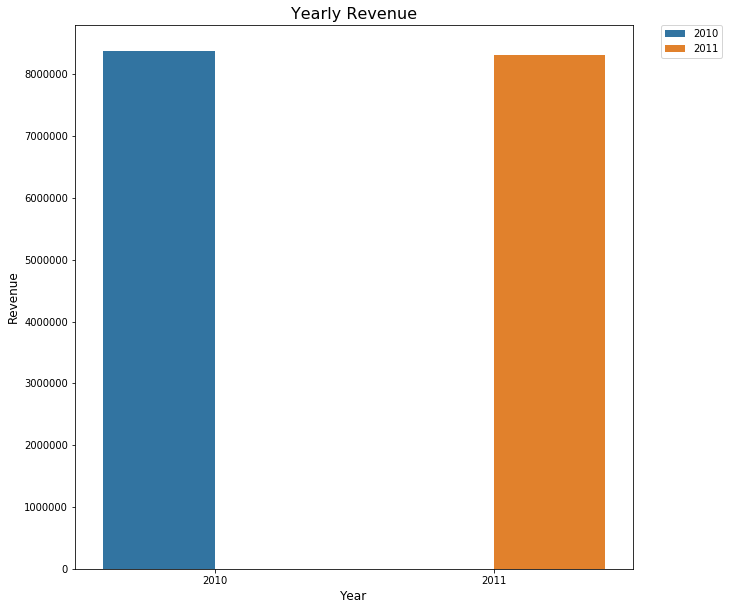

In [138]:
#plotting Yearly Revenue

plt.figure(figsize = (10,10))
sns.barplot(x = 'InvoiceYear',y = 'Revenue', hue = 'InvoiceYear', data = df_revenue_yearly)
plt.title('Yearly Revenue', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Revenue', fontsize = 12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()

### **Findings**: 
- Revenue is greater in 2010 than in 2011. 
- This can be attributed to the incomplete data of December 2011.

From this we can conclude that the store is performing relatively the same to the year prior. 

## Monthly Revenue

### Are the months different in revenue numbers? 
### Is there any **seasonality**? 

Now that we understand how much revenue we received in 2010 and 2011, we are curious over each year if the months are different or consistent. 

In [29]:
#Monthly Revenue Overview
df_monthlyrevenue = df.groupby(['InvoiceMonth','InvoiceYear','InvoiceYearMonth'])['Revenue'].sum().reset_index() # creating a monthly revenue dataframe
df_monthlyrevenue = df_monthlyrevenue.sort_values(['InvoiceYearMonth'],ascending = True)

Text(0, 0.5, 'Revenue')

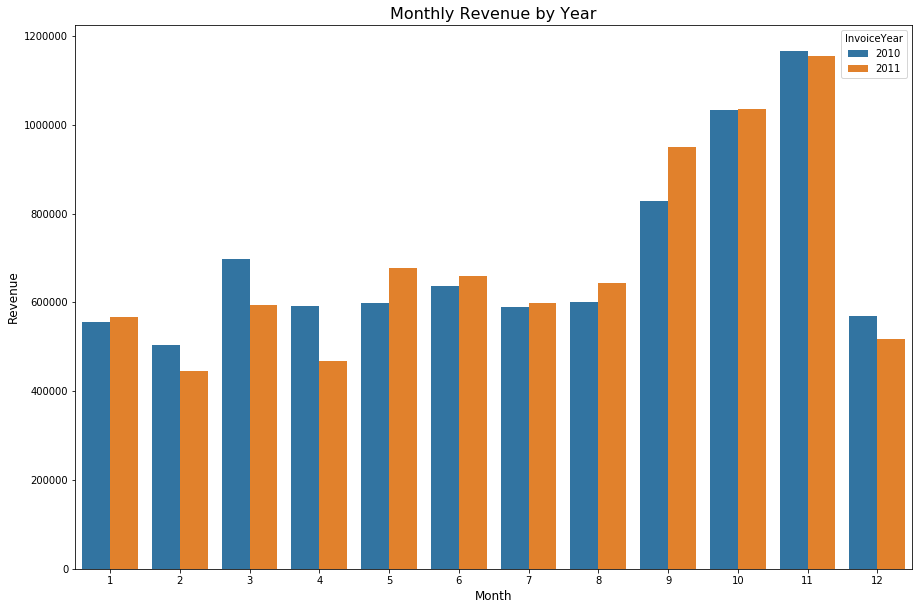

In [30]:
#plotting Monthly Revenue with a barchart

plt.figure(figsize = (15,10))
sns.barplot(x = 'InvoiceMonth',y = 'Revenue', hue = 'InvoiceYear', data = df_monthlyrevenue)
plt.title('Monthly Revenue by Year', fontsize = 16)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Revenue', fontsize = 12)

Text(0, 0.5, 'Revenue')

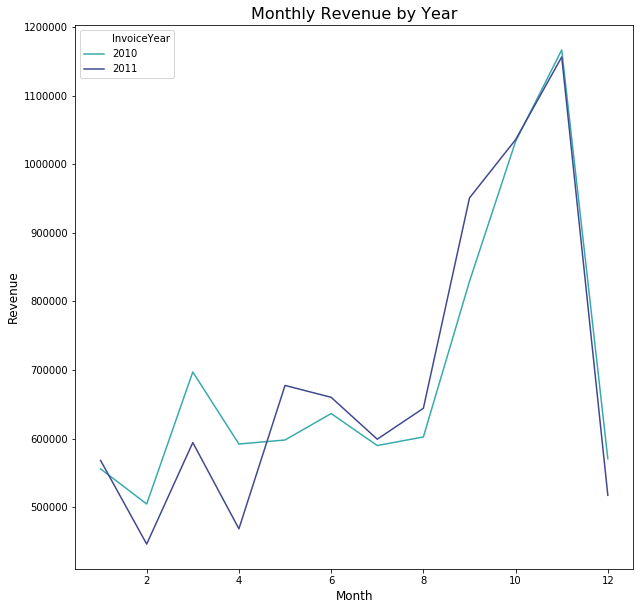

In [31]:
# Monthly Revenue Lineplot
palette = sns.color_palette("mako_r", 2)
plt.figure(figsize =(10,10))
sns.lineplot(x = 'InvoiceMonth', y = 'Revenue', hue = 'InvoiceYear',   palette=palette,data = df_monthlyrevenue)
plt.title('Monthly Revenue by Year', fontsize = 16)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Revenue', fontsize = 12)

### **Seasonality Check**

Analyzing the graph above we can observe seasonality: 
- Shallow peaks in March, May, and June. 
- Dips in January, February, April, and December. 
- Peaks in September to November. 
- Max revenue sold: \\$1166460.02
- Min revenue sold: \\$446084.92
- Average revenue sold: \\$695465.99

In [32]:
print('Max revenue sold: {}'.format(round(df_monthlyrevenue['Revenue'].max(),2)))
print('Min revenue sold: {}'.format(round(df_monthlyrevenue['Revenue'].min(),2)))
print('Average revenue sold: {}'.format(round(df_monthlyrevenue['Revenue'].mean(),2)))

Max revenue sold: 1166460.02
Min revenue sold: 446084.92
Average revenue sold: 695465.99


## Monthly Items Sold Overview


### How much product are we selling each month?
### Is there seasonality present here as well? 

Below we've graphed our Monthly Items Sold. 

In [33]:
df_quantity = df.groupby(['InvoiceYear'])['Quantity'].sum().reset_index()#creating a data frame to group quantites
df_quantity

,InvoiceYear,Quantity
0,2010,5275138.0
1,2011,4854822.0


In [34]:
df_quantity = df.groupby(['InvoiceYearMonth', 'InvoiceYear','InvoiceMonth'])['Quantity'].sum().reset_index()#modifying the dataframe to include months


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

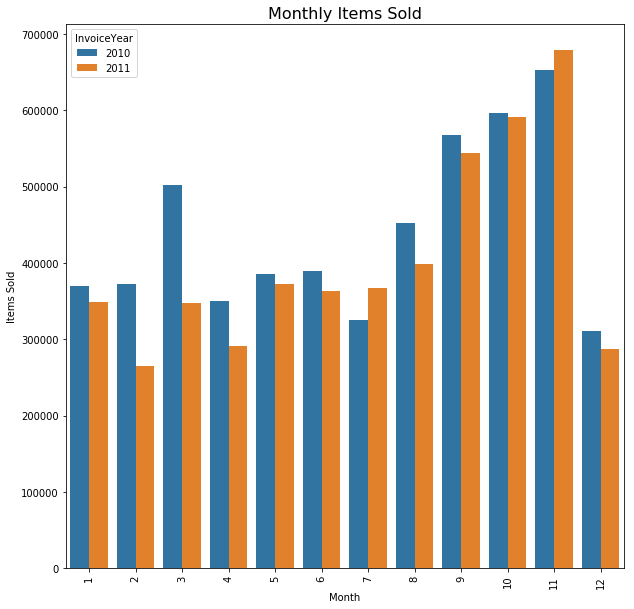

In [139]:
#Monthly Items Sold Overview
plt.figure(figsize = (10,10))
sns.barplot(x = 'InvoiceMonth', y = 'Quantity',hue = 'InvoiceYear' ,data = df_quantity)
plt.title('Monthly Items Sold', fontsize = 16)
plt.xlabel('Month')
plt.ylabel('Items Sold')
plt.xticks(rotation = 90)

### **Findings**

- Quantity of items sold seem to correlate with our revenue.  
- Strong showing in March 2010. 
- Seasonality similiar to Revenue. 
- Max items sold: 678760.0
- Min items sold: 265043.0
- Average items sold: 422081.67

In [36]:
print('Max items sold: {}'.format(df_quantity['Quantity'].max()))
print('Min items sold: {}'.format(df_quantity['Quantity'].min()))
print('Average items sold: {}'.format(round(df_quantity['Quantity'].mean(),2)))

Max items sold: 678760.0
Min items sold: 265043.0
Average items sold: 422081.67


##  Monthly Active Customers

### In 2010 and 2011 we had 5790 different customers! 

#### Can we identify any seasonality in our cusomters visiting our stores? 

In [37]:
total_active_customers=df['CustomerID'].nunique()
print('In 2010 and 2011 we had {} customers'.format(total_active_customers))

In 2010 and 2011 we had 5790 customers


Text(0, 0.5, 'Total Customers')

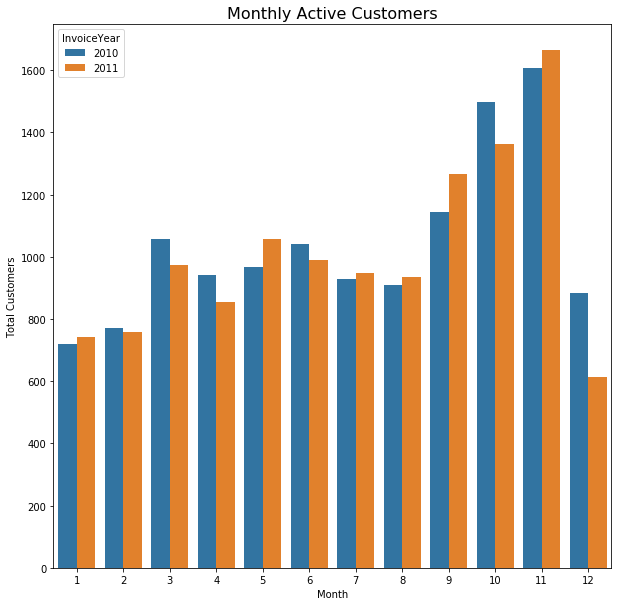

In [38]:
df_active = df.groupby(['InvoiceMonth','InvoiceYear'])['CustomerID'].nunique().reset_index()
plt.figure(figsize = (10,10))
sns.barplot(x = 'InvoiceMonth', y = 'CustomerID', hue = 'InvoiceYear',data = df_active)
plt.title('Monthly Active Customers', fontsize = 16)
plt.xlabel('Month')
plt.ylabel('Total Customers')

### Findings: 
- The graph seems to resemble our trends viewed in revenue and items sold.
- Maximum number of customers seen in one month 1665
- Minimum number of customers seen in one month 615
- Average number of customers seen in one month 1026.67



In [39]:
print('Maximum number of customers seen in one month {}'.format(df_active['CustomerID'].max()))
print('Minimum number of customers seen in one month {}'.format(df_active['CustomerID'].min()))
print('Average number of customers seen in one month {}'.format(round(df_active['CustomerID'].mean(),2)))

Maximum number of customers seen in one month 1665
Minimum number of customers seen in one month 615
Average number of customers seen in one month 1026.67


## Average Revenue per Order

### How much is our customer buying on average on each of their visits? 

In [40]:
df_monthly_avg = df.groupby(['InvoiceYear'])['Revenue'].mean().reset_index()
df_monthly_avg

,InvoiceYear,Revenue
0,2010,21.913923
1,2011,22.657939


In [41]:
print('The average revenue in 2010 and 2011 was {}'.format(round(df['Revenue'].mean(),2)))

The average revenue in 2010 and 2011 was 22.28


In [42]:
df_monthly_avg = df.groupby(['InvoiceYear'])['Revenue'].std().reset_index()
df_monthly_avg

,InvoiceYear,Revenue
0,2010,78.272446
1,2011,321.128319


In [43]:
df_monthly_avg = df.groupby(['InvoiceYearMonth','InvoiceYear','InvoiceMonth'])['Revenue'].mean().reset_index()
df_monthly_avg_pivot = round(pd.pivot_table(df_monthly_avg, values = 'Revenue', columns = 'InvoiceYear', index = 'InvoiceMonth'),2)
df_monthly_avg_pivot

InvoiceYear,2010,2011
InvoiceMonth,,
1,25.90,27.06
2,21.90,22.64
3,21.93,22.11
4,22.06,20.88
5,21.17,24.13
6,20.73,24.51
7,22.13,22.53
8,23.14,24.04
9,24.29,23.96


Text(0, 0.5, 'Revenue')

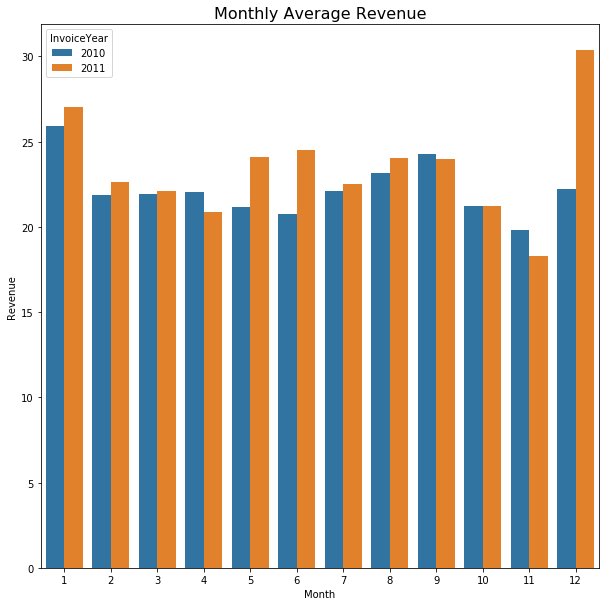

In [44]:
plt.figure(figsize = (10,10))
sns.barplot(x = 'InvoiceMonth', y = 'Revenue',hue = 'InvoiceYear', data = df_monthly_avg)
plt.title('Monthly Average Revenue', fontsize = 16)
plt.xlabel('Month')
plt.ylabel('Revenue')


In [45]:
print('Standard Deviation per Order Overall is {}'.format(round(df_monthly_avg_pivot.std(),2)))

Standard Deviation per Order Overall is InvoiceYear
2010    1.63
2011    3.08
dtype: float64


### Findings:
- Data remains relatively consistent.
- In 2010 we saw an average revenue of \\$21.92
- In 2011 we saw an average purchase of \\$22.65.
- Average in 2010 and 2011 is \\$22.28. 

## Summarizing our Data Exploration: 
- Our revenue between 2010 and 2011 are fairly consistent of approximately \\$8 Million in sales. 
- We viewed seasonality in our customers purchasing behavior and this was seen across in Revenue, Quantity & total number of Customers. 
- In 2010 and 2011 we have served a total of 5790 customers.
- The average revenue from our customers in 2010 and 2011 was \\$22.65

# 3 - Customer Analysis

#### The following analyses are to understand what type of customers we have and how are we retaining them.


## New vs. Existing Customer Analysis

In [46]:
df_first_purchase = df.groupby(['CustomerID'])['InvoiceDate'].min().reset_index()
df_first_purchase.columns = ['CustomerID','FirstPurchaseDate']
df_first_purchase.head()

,CustomerID,FirstPurchaseDate
0,12346.0,2010-03-02
1,12347.0,2010-10-31
2,12348.0,2010-09-27
3,12349.0,2010-04-29
4,12350.0,2011-02-02


In [47]:
#grouping df_First_Purchase with df to distinguish between New & Existing Users
df = pd.merge(df,df_first_purchase, on = 'CustomerID')
df['UserType'] = np.where(df['InvoiceDate']>df['FirstPurchaseDate'], 'Existing', 'New')
df.head()

,Invoice,StockCode,InvoiceDate,InvoiceMonth,InvoiceYear,InvoiceYearMonth,CustomerID,Country,Description,Quantity,Price,Revenue,FirstPurchaseDate,UserType
0,493414,21844,2010-01-04,1,2010,201001,14590.0,United Kingdom,RETRO SPOT MUG,36.0,2.55,91.8,2010-01-04,New
1,493414,21533,2010-01-04,1,2010,201001,14590.0,United Kingdom,RETRO SPOT LARGE MILK JUG,12.0,4.25,51.0,2010-01-04,New
2,493414,37508,2010-01-04,1,2010,201001,14590.0,United Kingdom,NEW ENGLAND CERAMIC CAKE SERVER,2.0,2.55,5.1,2010-01-04,New
3,493414,35001G,2010-01-04,1,2010,201001,14590.0,United Kingdom,HAND OPEN SHAPE GOLD,2.0,4.25,8.5,2010-01-04,New
4,493414,21527,2010-01-04,1,2010,201001,14590.0,United Kingdom,RETRO SPOT TRADITIONAL TEAPOT,12.0,6.95,83.4,2010-01-04,New


In [48]:
df_usertypes = df.groupby(['InvoiceYear','UserType'])['CustomerID'].nunique().reset_index()
df_usertypes = pd.pivot_table(df_usertypes,values = 'CustomerID', index = 'InvoiceYear', columns = 'UserType',margins = True)
df_usertypes

UserType,Existing,New,All
InvoiceYear,,,
2010,2739,4231,3485
2011,3471,1559,2515
All,3105,2895,3000


## New Customer Ratio

Based on our new column we are able to find how many new customers we have each month. 

In [49]:
df_user_ratio = ((df.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique())/(df.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()))
df_user_ratio = df_user_ratio.reset_index()
df_user_ratio = df_user_ratio.dropna()
df_user_ratio.columns = ['InvoiceYearMonth','NewCustomerRatio']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

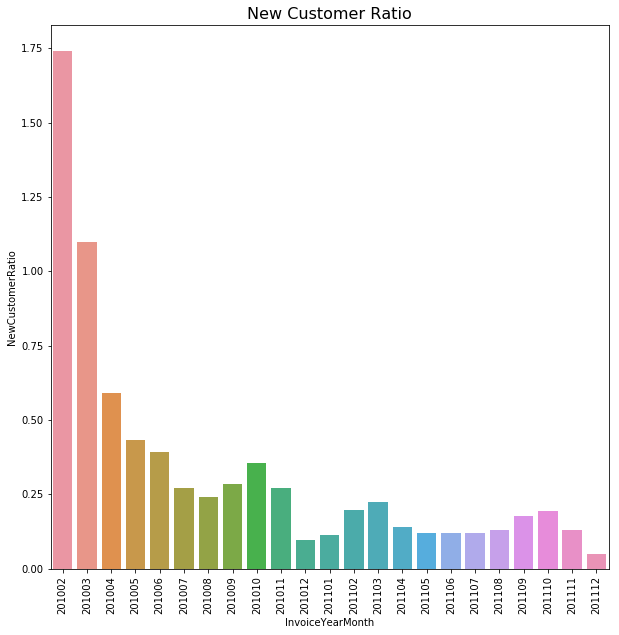

In [137]:
plt.figure(figsize = (10,10))
sns.barplot(x = df_user_ratio.query('InvoiceYearMonth>201001')['InvoiceYearMonth'],y= 'NewCustomerRatio',data = df_user_ratio)
plt.title('New Customer Ratio', fontsize = 16)

plt.xticks(rotation = 90)

In [51]:
print('Average New Customer Ratio: {}'.format(df_user_ratio['NewCustomerRatio'].mean()))

Average New Customer Ratio: 0.5553263135695328


New Customer Ratio seems to be decreasing overtime. 

## Monthly Retention Rate

### We have customers, great! But how are we retaining them? 
Now that we understand how many new customers we are receiving it would be interesting to understand how many of our customers we are actually retaining from the previous month. 



Methodology: 
- Crosstab to show which customers are active each month. 
- Used a for loop to create an array of dictionary which kept **Retained** and **Total User Count** for each month. 
- Calculated **Monthly Retention Rate** = Retained Customers From Prev Month/Active Customers Total

In [52]:
df_user_purchase = df.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index() #identify which users are active by looking at their revenue per month
df_retention =pd.DataFrame(df[['InvoiceYearMonth','Country','CustomerID']]).sort_values('InvoiceYearMonth').reset_index(drop = True) # create a new retention dataframe

In [53]:
#create retention matrix with crosstab
df_retention = pd.crosstab(df_user_purchase['CustomerID'],df_user_purchase['InvoiceYearMonth'])#this show us which customer are active on each month --> 1 meaning they are active



In [54]:
# for loop to create an array of dictionary which keeps Retained & Total User count for each month

months = df_retention.columns[1:] # gives us all the months from df_retention dataframe above

retention_array = [] # where we will keep the dictionary data

for i in range(len(months)-1):
    retention_data = {} #dictionary used to retain total users from each month and how many are retained
    selected_month = months[i+1] # used to select the next month
    prev_month = months[i] # used to select the previous month
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = df_retention[selected_month].sum() # total amount of users in the month we are looking at
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_month]>0)&(df_retention[prev_month]>0)][selected_month].sum() # total amount of users retained
    retention_array.append(retention_data)
                                                       

In [55]:
#convert the array to dataframe and calculate Retention Rate

df_retention = pd.DataFrame(retention_array)
df_retention['RetentionRate'] = df_retention['RetainedUserCount']/df_retention['TotalUserCount']
df_retention['PercentChange'] = df_retention['RetentionRate'].pct_change()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

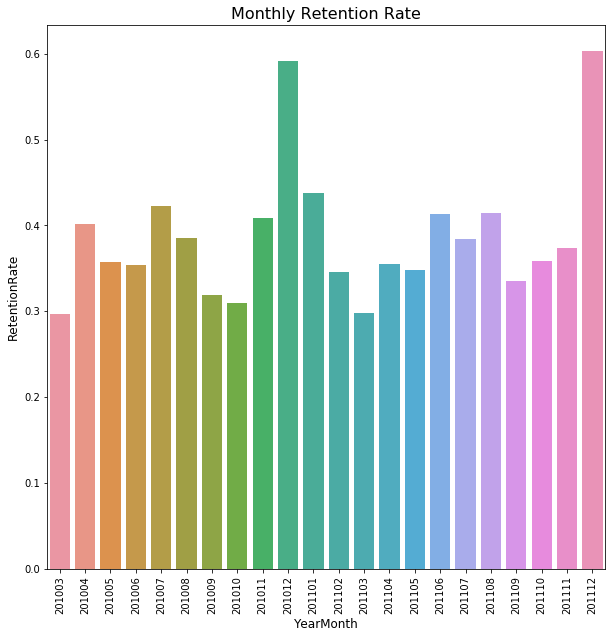

In [56]:
#Plotting Retention Rate 
plt.figure(figsize = (10,10))
sns.barplot(x = 'InvoiceYearMonth',y = 'RetentionRate',data = df_retention)
plt.title('Monthly Retention Rate', fontsize = 16)
plt.xlabel('YearMonth',fontsize = 12)
plt.ylabel('RetentionRate', fontsize = 12)
plt.xticks(rotation=90)


In [57]:
print('The average retention rate for each month is {}'.format(round(df_retention['RetainedUserCount'].sum()/df_retention['TotalUserCount'].sum(),4)))

The average retention rate for each month is 0.3791


### Findings: 
- There does not seem to be any true trend in regards to our retention rate. 
- On average we are retaining 38% of our customers from the previous month. 

## Cohort Retention Rate

Now that we understand how many customer we retain on average each month it would be interesting to view how many customers we've retained in a cohort. 

#### Cohort = Each month in the year 2010 & 2011


In [58]:
#create our retention table again with crosstab()
df_retention_cohort = pd.crosstab(df_user_purchase['CustomerID'],df_user_purchase['InvoiceYearMonth'])
new_column_names = ['m_'+str(column) for column in df_retention_cohort.columns]
df_retention_cohort.columns = new_column_names

In [59]:
df_retention_cohort.head() # look at our newly named rentention matrix

,m_201001,m_201002,m_201003,m_201004,m_201005,m_201006,m_201007,m_201008,m_201009,m_201010,...,m_201103,m_201104,m_201105,m_201106,m_201107,m_201108,m_201109,m_201110,m_201111,m_201112
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,1
12348.0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
12349.0,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#create the array of Retained Users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months: 
        retention_data[prev_month] = np.nan
    
    total_user_count = retention_data['TotalUserCount'] = df_retention_cohort['m_'+str(selected_month)].sum()
    retention_data[selected_month]=1
    
    query = "{} > 0".format('m_' + str(selected_month))
    

    for next_month in next_months:
        query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(df_retention_cohort.query(query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
    
df_retention_cohort = pd.DataFrame(retention_array)
df_retention_cohort.index = months

#showing new cohort based retention table
df_retention_cohort

,TotalUserCount,201002,201003,201004,201005,201006,201007,201008,201009,201010,...,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
InvoiceYearMonth,,,,,,,,,,,,,,,,,,,,,
201002,772,1.0,0.41,0.23,0.16,0.14,0.12,0.10,0.08,0.08,...,0.05,0.05,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.03
201003,1057,NaN,1.00,0.36,0.20,0.15,0.12,0.09,0.08,0.07,...,0.04,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.03,0.02
201004,942,NaN,NaN,1.00,0.37,0.23,0.17,0.13,0.10,0.09,...,0.05,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.03
201005,966,NaN,NaN,NaN,1.00,0.38,0.24,0.16,0.12,0.10,...,0.05,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.03
201006,1041,NaN,NaN,NaN,NaN,1.00,0.38,0.22,0.15,0.12,...,0.05,0.05,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.03
201007,928,NaN,NaN,NaN,NaN,NaN,1.00,0.38,0.22,0.16,...,0.06,0.06,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.04
201008,911,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.40,0.24,...,0.07,0.06,0.06,0.06,0.05,0.05,0.05,0.04,0.04,0.04
201009,1145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.40,...,0.07,0.06,0.06,0.05,0.05,0.05,0.05,0.04,0.04,0.03
201010,1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,...,0.07,0.05,0.05,0.04,0.04,0.04,0.04,0.03,0.03,0.03


In [61]:
#slice the data inorder to leverage a heatmap
df_retention_cohort_heatmap = df_retention_cohort.iloc[0:,1:]


In [1]:
plt.figure(figsize = (20,10))
sns.heatmap(df_retention_cohort_heatmap,cmap="magma",vmax = .5,linewidths=.5,center = .2, annot = True)
plt.title('Cohort Retention Rate', fontsize = 18)
plt.xlabel('Year Month',fontsize = 12)
plt.ylabel('Year Month', fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

NameError: name 'plt' is not defined

### Findings: 
- Overall our cohort retention rate seems to be quite poor. 
- From February 2010 to February 2011 we are retaining approximately 5% of our customers. 
- From February 2010 to November 2011 we are only retaining 3% of our customers. 
- We are retaining on average 38% of our customers after each month, but in 12 months we are only retaining 5%. 

### In order to increase revenue, it is important to focus on our current customers and increase retention rates. 
This can be improved by reaching our to our top value customers more frequently or leveraging social media and email marketing tools to remarket to them.

Currently, we have months where we have over **1600** customers so it is important to understand which customers to focus on. 

# 4 -  RFM Analysis (Recency, Frequency, Monetary)

Now that we know a bit about our customers and our business we would like to cluster our customers in order to find our: 
- High Value Customers
- Mid Value Customers
- Low Value Customers

In order to conduct this analysis we will be completing an RFM Analysis which takes into account a customer's Recency, Frequency, and Monetary value and provides an overall score. 
This will be completed by using the clustering algorithm KMeans from Sklearn.

This analysis will help overall marketing efforts and allow the marketing team to dedicate their efforts to our best customers. 

## Recency

In [63]:
#creating a dataframe to keep UNIQUE CustomerIDs
df_user = pd.DataFrame(df['CustomerID'].unique())
df_user.columns = ['CustomerID']

In [64]:
df_last_purchase = df.groupby(['CustomerID'])['InvoiceDate'].max().reset_index()
df_last_purchase.columns = ['CustomerID','LastPurchaseDate']
df_last_purchase['Recency'] = (df_last_purchase['LastPurchaseDate'].max()-df_last_purchase['LastPurchaseDate']).dt.days # calculating the recency
df_last_purchase.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [65]:
df_user = pd.merge(df_user,df_last_purchase[['CustomerID','Recency']]) # merging unique customer IDs with the last_purchase_dataframe
df_user.head()

,CustomerID,Recency
0,14590.0,424
1,13287.0,603
2,16550.0,108
3,14680.0,25
4,14709.0,15


In [66]:
df_user.describe()

,CustomerID,Recency
count,5790.000000,5790.000000
mean,15310.562176,192.705699
std,1716.383701,200.336694
min,12346.000000,0.000000
25%,13826.250000,25.000000
50%,15307.500000,91.000000
75%,16792.750000,374.000000
max,18287.000000,703.000000


Text(0, 0.5, 'Customer Count')

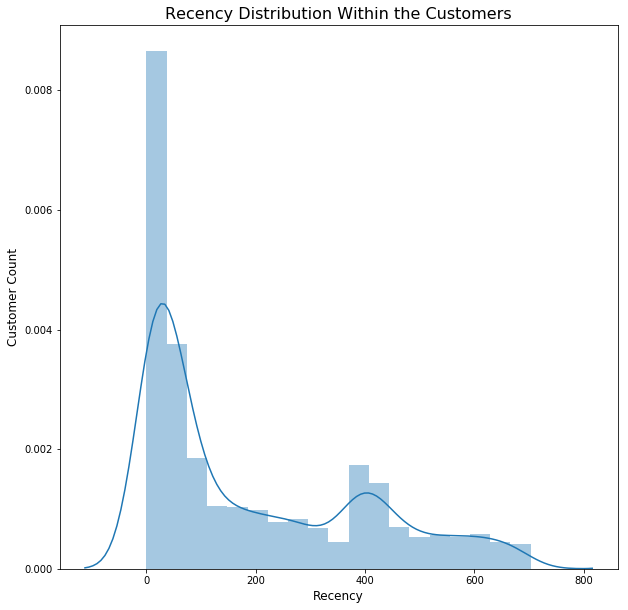

In [67]:
#Look at the distribution of Recency
plt.figure(figsize = (10,10))
sns.distplot(df_user['Recency'])
plt.title('Recency Distribution Within the Customers', fontsize = 16)
plt.xlabel('Recency', fontsize = 12)
plt.ylabel('Customer Count', fontsize = 12)


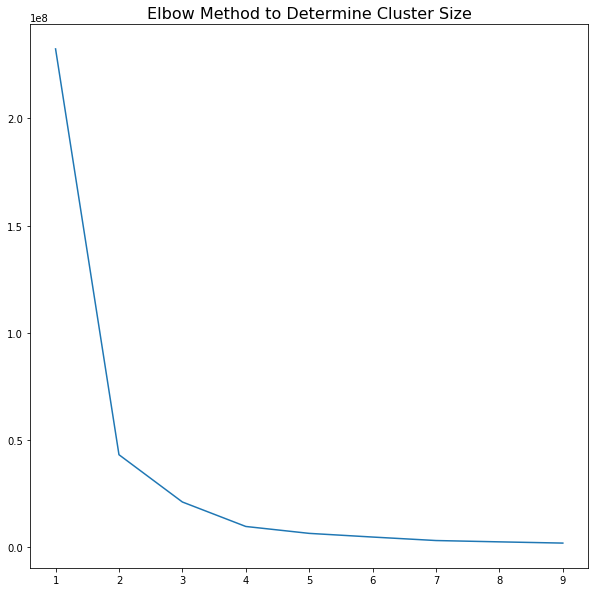

In [68]:
# use KMeans Clustering for Recency Clustering
from sklearn.cluster import KMeans

#find out how many clusters are optimal using the elbow method
dic = {} #store the clusterin values in a dictionary
df_recency= df_user[['Recency']] #label what we are clustering
for k in range(1,10):
    kmeans = KMeans(n_clusters = k,max_iter = 1000).fit(df_recency)
    df_recency['clusters'] = kmeans.labels_
    dic[k] = kmeans.inertia_
plt.figure(figsize = (10,10))
plt.plot(list(dic.keys()),list(dic.values()))
plt.title('Elbow Method to Determine Cluster Size', fontsize = 16)
plt.show()

Analyzing to view where there is a elbow created in the graph. 

From this analysis it seems it is between 3 and 4. 

We will be choosing 4 for our clustering sizes. 

In [69]:
#Cluster Customer based on Recency

kmodel_recency = KMeans(n_clusters = 4)
kmodel_recency.fit(df_user[['Recency']])
df_user['RecencyCluster'] = kmodel_recency.predict(df_user[['Recency']])

df_user.head()

,CustomerID,Recency,RecencyCluster
0,14590.0,424,1
1,13287.0,603,2
2,16550.0,108,0
3,14680.0,25,0
4,14709.0,15,0


In [70]:
# get statistical analysis for each cluster
df_user.groupby(['RecencyCluster'])['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,3127.0,36.890950,30.813152,0.0,11.00,28.0,58.0,121.0
1,1084.0,401.730627,45.396187,304.0,375.00,400.5,432.0,497.0
2,619.0,592.804523,57.188347,498.0,544.00,592.0,640.5,703.0
3,960.0,206.235417,51.818533,122.0,161.75,203.0,252.0,303.0


In [71]:
#function for ordering cluster numbers

def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_user = order_cluster('RecencyCluster','Recency',df_user,False)
df_user.groupby(['RecencyCluster'])['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,619.0,592.804523,57.188347,498.0,544.00,592.0,640.5,703.0
1,1084.0,401.730627,45.396187,304.0,375.00,400.5,432.0,497.0
2,960.0,206.235417,51.818533,122.0,161.75,203.0,252.0,303.0
3,3127.0,36.890950,30.813152,0.0,11.00,28.0,58.0,121.0


Running descriptive statistics on the recency cluster.
### **Findings**: 
- Group of very recent clusters in group 3. 
- Recency begins to diminish in group 1 and very little recency seen in group 0. 

## Frequency

We will be taking the similar steps with frequency. 

**First** looking at our distribution: 

In [72]:
df_user.head()

,CustomerID,Recency,RecencyCluster
0,14590.0,424,1
1,13206.0,400,1
2,17807.0,395,1
3,14839.0,418,1
4,13965.0,476,1


In [73]:
#frequency of orders 
df_frequency = df.groupby(['CustomerID'])['InvoiceDate'].count().reset_index()
df_frequency.columns = ['CustomerID', 'Frequency']
df_user = pd.merge(df_user,df_frequency,on= 'CustomerID')
df_user.head()

,CustomerID,Recency,RecencyCluster,Frequency
0,14590.0,424,1,155
1,13206.0,400,1,393
2,17807.0,395,1,89
3,14839.0,418,1,74
4,13965.0,476,1,24


Text(0, 0.5, 'Count')

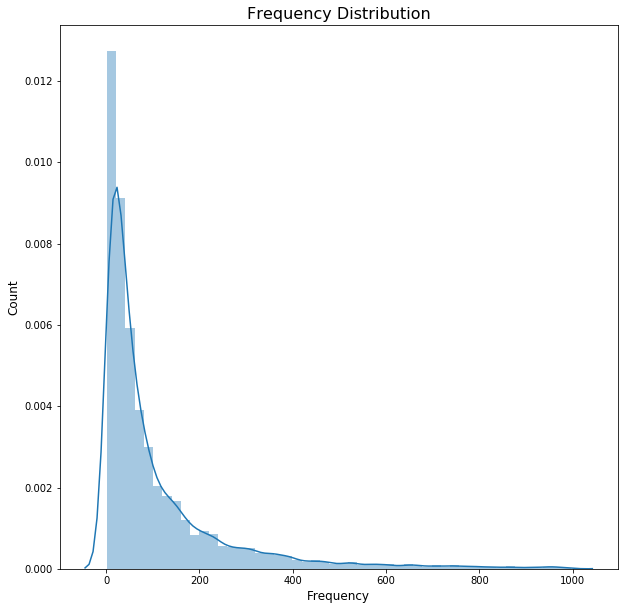

In [74]:
plt.figure(figsize = (10,10))
sns.distplot(df_frequency.query('Frequency<1000')['Frequency'])
plt.title('Frequency Distribution',fontsize = 16)
plt.xlabel('Frequency' ,fontsize = 12)
plt.ylabel('Count', fontsize = 12)

In [75]:
k_model_frequency = KMeans(n_clusters = 4)
k_model_frequency.fit(df_frequency [['Frequency']])
k_model_frequency_predict = k_model_frequency.predict(df_frequency [['Frequency']])
df_user['FrequencyCluster'] = k_model_frequency_predict
df_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,14590.0,424,1,155,0
1,13206.0,400,1,393,0
2,17807.0,395,1,89,0
3,14839.0,418,1,74,0
4,13965.0,476,1,24,0


In [76]:
#Statistical Analysis of clusters based on frequency
df_user.groupby(['FrequencyCluster'])['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,5317.0,125.592627,261.529862,1.0,21.0,52.0,136.00,6508.0
1,14.0,1067.928571,3132.866922,3.0,54.0,139.5,474.25,11921.0
2,457.0,145.280088,543.782287,1.0,19.0,43.0,134.00,10827.0
3,2.0,44.000000,9.899495,37.0,40.5,44.0,47.50,51.0


In [77]:
#Ordering clusters based on frequency
df_user = order_cluster('FrequencyCluster','Frequency',df_user,True)
df_user.groupby(['FrequencyCluster'])['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,2.0,44.000000,9.899495,37.0,40.5,44.0,47.50,51.0
1,5317.0,125.592627,261.529862,1.0,21.0,52.0,136.00,6508.0
2,457.0,145.280088,543.782287,1.0,19.0,43.0,134.00,10827.0
3,14.0,1067.928571,3132.866922,3.0,54.0,139.5,474.25,11921.0



### **Findings**: 
- Very frequent customers in group 3. 
- Frequency seems to tail off quite rapidly in group 2,1,and 0. 

##  Monetary

In [78]:
df_customer_revenue=df.groupby(["CustomerID"])["Revenue"].sum().reset_index()
df_customer_revenue=pd.merge(df_user, df_customer_revenue, on="CustomerID")
df_customer_revenue.head()


,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,14590.0,424,1,155,1,2643.71
1,13206.0,400,1,393,1,5847.27
2,17807.0,395,1,89,1,437.87
3,14839.0,418,1,74,1,915.28
4,13965.0,476,1,24,1,996.61


Text(0, 0.5, 'Count')

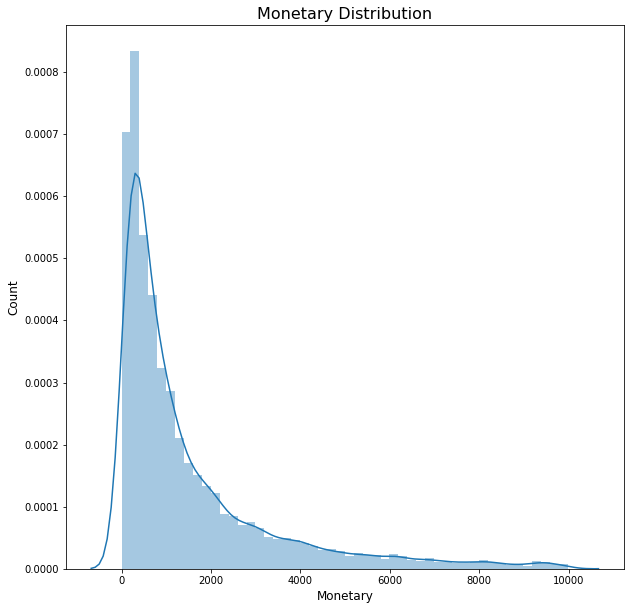

In [79]:
# Revenue Distribution
plt.figure(figsize=(10,10))
sns.distplot(df_customer_revenue.query("Revenue < 10000")["Revenue"])
plt.title('Monetary Distribution',fontsize = 16)
plt.xlabel('Monetary' ,fontsize = 12)
plt.ylabel('Count', fontsize = 12)

In [80]:
df_monetary = df.groupby(['CustomerID'])['Revenue'].sum().reset_index()
df_monetary.columns = ['CustomerID', 'Monetary']

In [81]:
# Segmenting Customers Based on their Monetary Value
k_model_monetary=KMeans(n_clusters=4)
k_model_monetary.fit(df_monetary[['Monetary']])
k_model_monetary_predict=k_model_monetary.predict(df_monetary[['Monetary']])
df_user["MonetaryCluster"]=k_model_monetary_predict


In [82]:
df_user = pd.merge(df_user,df_monetary,on= 'CustomerID')
df_user.head()


,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,MonetaryCluster,Monetary
0,14590.0,424,1,155,1,3,2643.71
1,13206.0,400,1,393,1,0,5847.27
2,17807.0,395,1,89,1,0,437.87
3,14839.0,418,1,74,1,0,915.28
4,13965.0,476,1,24,1,0,996.61


In [83]:
#Ordering clusters based on monetary
df_user= order_cluster('MonetaryCluster','Monetary',df_user,True)
df_user.groupby(['MonetaryCluster'])['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,2.0,1998.580000,142.849712,1897.57,1948.0750,1998.5800,2049.0850,2099.59
1,42.0,2624.357619,5253.195116,60.96,273.5275,742.7400,1659.3425,26437.05
2,5738.0,2884.642490,13982.052095,0.00,343.2475,852.7050,2208.6200,539981.30
3,8.0,3110.633875,2932.331587,460.40,649.4100,1790.2255,6034.9900,7346.24


Findings: 
- We have some very high value customers in Cluster 3.
- Cluster 2 has the highest number of users and an admirable amount in regards to monetary value. 

## Overall Score

In [84]:
df_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster
0,14590.0,424,1,155,1,2643.71,1
1,13613.0,452,1,59,1,1039.85,1
2,16679.0,366,1,18,1,663.31,1
3,15459.0,417,1,7,1,202.83,1
4,14510.0,375,1,75,1,979.85,1


In [85]:
#Calculate overall score and use mean() to see details

df_user['OverallScore'] = df_user['RecencyCluster'] + df_user['FrequencyCluster'] + df_user['MonetaryCluster']
df_user.groupby('OverallScore')['Recency','Frequency','Monetary'].mean()

,Recency,Frequency,Monetary
OverallScore,,,
2,580.000000,19.166667,166.251667
3,589.730769,27.676573,667.588446
4,409.180344,50.073473,946.187263
5,219.152977,71.546201,1416.509923
6,41.806143,184.620819,4335.350147
7,39.668000,221.376000,4415.430160
8,27.500000,1481.600000,13060.737000


The scoring above clearly shows that our customers with a score of 8 is our best customer and our customers with a socre of 0 is our worst. 

In [86]:
df_user['Segment'] = 'Low-Value'
df_user.loc[df_user['OverallScore']>4,'Segment'] = 'Mid-Value'
df_user.loc[df_user['OverallScore']>6,'Segment'] = 'High-Value'

In [87]:
df_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment
0,14590.0,424,1,155,1,2643.71,1,3,Low-Value
1,13613.0,452,1,59,1,1039.85,1,3,Low-Value
2,16679.0,366,1,18,1,663.31,1,3,Low-Value
3,15459.0,417,1,7,1,202.83,1,3,Low-Value
4,14510.0,375,1,75,1,979.85,1,3,Low-Value


Text(0, 0.5, 'Revenue')

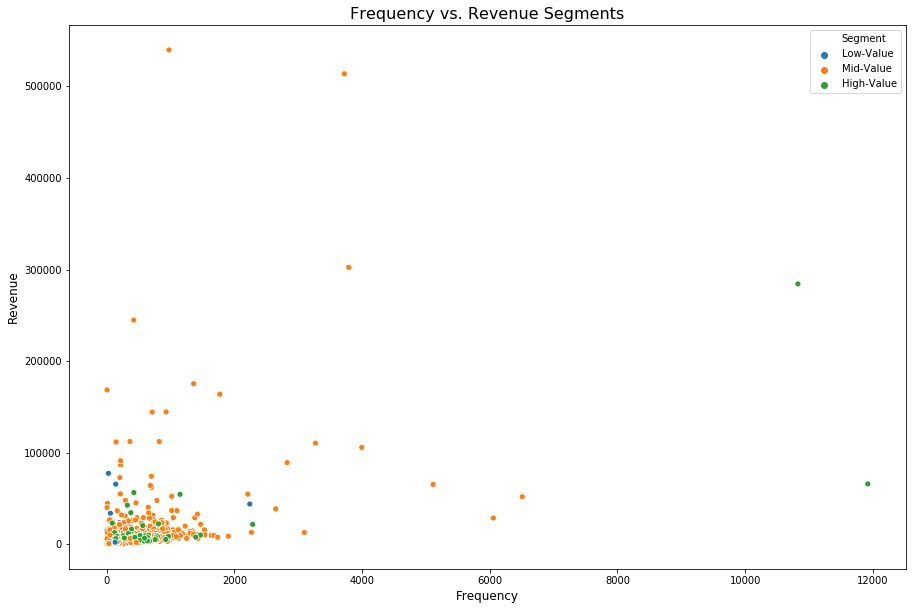

In [88]:
plt.figure(figsize = (15,10))
sns.scatterplot(x = df_user['Frequency'], y = df_user['Monetary'], hue = 'Segment', data = df_user)
plt.title('Frequency vs. Revenue Segments',fontsize = 16)
plt.xlabel('Frequency',fontsize = 12)
plt.ylabel('Revenue',fontsize = 12)


Text(0, 0.5, 'Revenue')

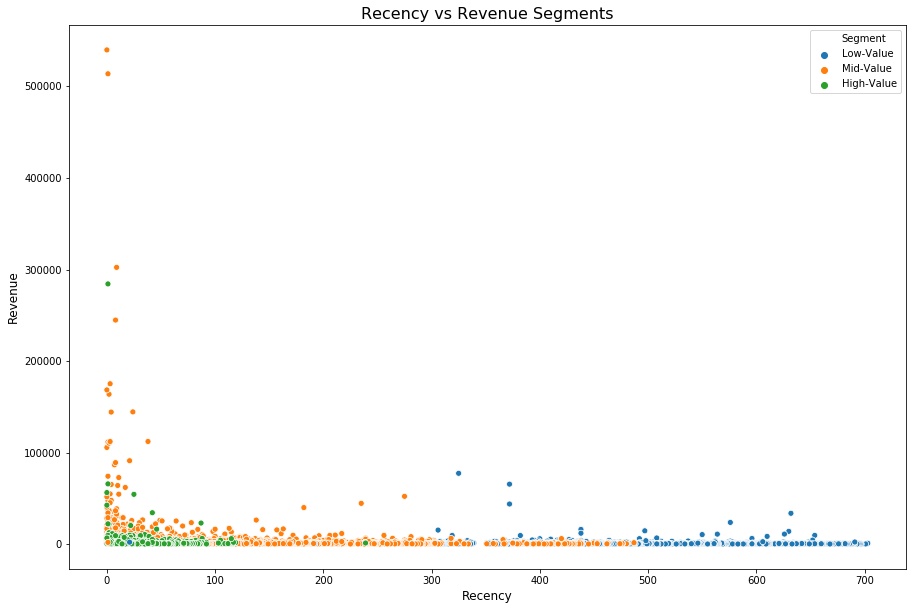

In [89]:
plt.figure(figsize = (15,10))
sns.scatterplot(x = df_user['Recency'], y = df_user['Monetary'], hue = 'Segment', data = df_user)
plt.title('Recency vs Revenue Segments',fontsize = 16)
plt.xlabel('Recency',fontsize = 12)
plt.ylabel('Revenue',fontsize = 12)

Text(0, 0.5, 'Frequency')

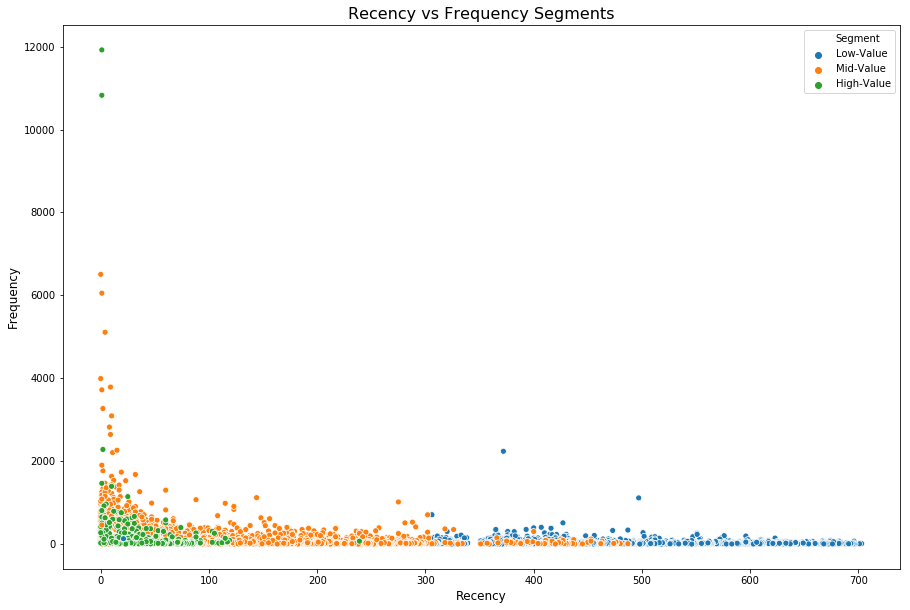

In [140]:
plt.figure(figsize = (15,10))
sns.scatterplot(x = df_user['Recency'], y = df_user['Frequency'], hue = 'Segment', data = df_user)
plt.title('Recency vs Frequency Segments',fontsize = 16)
plt.xlabel('Recency',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12)

In [142]:
segment_grouping= df_user.groupby('Segment')['Segment'].count()
segment_grouping.reindex(['High-Value','Mid-Value','Low-Value'], axis=0)

Segment
High-Value     260
Mid-Value     3904
Low-Value     1626
Name: Segment, dtype: int64

In [92]:
df_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment
0,14590.0,424,1,155,1,2643.71,1,3,Low-Value
1,13613.0,452,1,59,1,1039.85,1,3,Low-Value
2,16679.0,366,1,18,1,663.31,1,3,Low-Value
3,15459.0,417,1,7,1,202.83,1,3,Low-Value
4,14510.0,375,1,75,1,979.85,1,3,Low-Value


In [93]:
df_unique =df[['CustomerID','Country']]
df_unique = df_unique.drop_duplicates(keep = 'first')

In [94]:
df_user_country = pd.merge(df_user,df_unique, how = 'inner', on = 'CustomerID')
df_user_country.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,Country
0,14590.0,424,1,155,1,2643.71,1,3,Low-Value,United Kingdom
1,13613.0,452,1,59,1,1039.85,1,3,Low-Value,United Kingdom
2,16679.0,366,1,18,1,663.31,1,3,Low-Value,United Kingdom
3,15459.0,417,1,7,1,202.83,1,3,Low-Value,United Kingdom
4,14510.0,375,1,75,1,979.85,1,3,Low-Value,United Kingdom


In [95]:
df_user_country = pd.pivot_table(data =df_user_country, values = 'CustomerID', index = 'Country', columns = 'Segment', aggfunc = lambda x: len(x.unique()))
df_user_country = df_user_country.fillna(0)
df_user_country = df_user_country.sort_values(by = ['High-Value', 'Mid-Value'], ascending = False)
df_user_country= df_user_country.reindex(['High-Value','Mid-Value','Low-Value'], axis=1)

In [96]:
df_user_country.head()

Segment,High-Value,Mid-Value,Low-Value
Country,,,
United Kingdom,233.0,3544.0,1489.0
France,6.0,71.0,18.0
Germany,5.0,85.0,17.0
Belgium,4.0,20.0,5.0
Norway,2.0,7.0,3.0


In [97]:
df_user_country.tail()

Segment,High-Value,Mid-Value,Low-Value
Country,,,
Korea,0.0,0.0,2.0
Lebanon,0.0,0.0,1.0
Nigeria,0.0,0.0,1.0
Thailand,0.0,0.0,1.0
West Indies,0.0,0.0,1.0


# 5 - Modeling: Classification

In [98]:
#Import libraries
from sklearn.feature_extraction import text # use text processing tools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import tree, metrics
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from scipy import stats, special
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score



#do not show warnings
import warnings
warnings.filterwarnings("ignore")

Purpose: 
- Using a classification model to determine the segment of a customer: High-Value, Mid-Value, and Low-Value. 
- Classification models: RandomForestClassifier, DecisionTreeClassifier, and MultinomialNB. 
- Use of ColumnTransformer to include both numeric data and text data from Description using CountVectorizer. 

In [99]:
df_logreg = df[['CustomerID','Description', 'Country','Quantity', 'Price','Revenue','UserType']] # creating a new dataframe to query on with independent and dependent variables

In [100]:
df_logreg = pd.merge(df_logreg,df_user, how = 'inner', on = 'CustomerID') # merging the data with our clutered group analysis
df_logreg.head()

,CustomerID,Description,Country,Quantity,Price,Revenue,UserType,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment
0,14590.0,RETRO SPOT MUG,United Kingdom,36.0,2.55,91.8,New,424,1,155,1,2643.71,1,3,Low-Value
1,14590.0,RETRO SPOT LARGE MILK JUG,United Kingdom,12.0,4.25,51.0,New,424,1,155,1,2643.71,1,3,Low-Value
2,14590.0,NEW ENGLAND CERAMIC CAKE SERVER,United Kingdom,2.0,2.55,5.1,New,424,1,155,1,2643.71,1,3,Low-Value
3,14590.0,HAND OPEN SHAPE GOLD,United Kingdom,2.0,4.25,8.5,New,424,1,155,1,2643.71,1,3,Low-Value
4,14590.0,RETRO SPOT TRADITIONAL TEAPOT,United Kingdom,12.0,6.95,83.4,New,424,1,155,1,2643.71,1,3,Low-Value


In [101]:
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df_logreg['SegmentNumeric'] = labelencoder.fit_transform(df_logreg['Segment'])
df_logreg['UserTypeNumeric'] = labelencoder.fit_transform(df_logreg['UserType'])
df_logreg['CountryNumeric'] = labelencoder.fit_transform(df_logreg['Country'])
df_logreg.head()

,CustomerID,Description,Country,Quantity,Price,Revenue,UserType,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,SegmentNumeric,UserTypeNumeric,CountryNumeric
0,14590.0,RETRO SPOT MUG,United Kingdom,36.0,2.55,91.8,New,424,1,155,1,2643.71,1,3,Low-Value,1,1,38
1,14590.0,RETRO SPOT LARGE MILK JUG,United Kingdom,12.0,4.25,51.0,New,424,1,155,1,2643.71,1,3,Low-Value,1,1,38
2,14590.0,NEW ENGLAND CERAMIC CAKE SERVER,United Kingdom,2.0,2.55,5.1,New,424,1,155,1,2643.71,1,3,Low-Value,1,1,38
3,14590.0,HAND OPEN SHAPE GOLD,United Kingdom,2.0,4.25,8.5,New,424,1,155,1,2643.71,1,3,Low-Value,1,1,38
4,14590.0,RETRO SPOT TRADITIONAL TEAPOT,United Kingdom,12.0,6.95,83.4,New,424,1,155,1,2643.71,1,3,Low-Value,1,1,38


In [102]:
feature_cols = ['Description','Quantity', 'Price', 'Revenue', 'Recency', 'RecencyCluster', 'Frequency', 'FrequencyCluster', 'Monetary', 'MonetaryCluster', 'OverallScore','UserTypeNumeric','CountryNumeric']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(df_logreg[feature_cols], df_logreg.SegmentNumeric, test_size=0.40, random_state=0)

In [104]:
# validate set shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(449524, 13) (449524,)
(299684, 13) (299684,)


In [105]:
numeric_features = ['Quantity', 'Price', 'Revenue', 'Recency', 'RecencyCluster', 'Frequency', 'FrequencyCluster', 'Monetary', 'MonetaryCluster', 'OverallScore','UserTypeNumeric']
numeric_transformer = Pipeline(steps=[
        ('scaler', MinMaxScaler())])

In [106]:
preprocessor = ColumnTransformer([
    ('description_countvec',CountVectorizer(stop_words = 'english'),'Description'),
    ('num', numeric_transformer,numeric_features)])

In [107]:
#create an array of models
models = []
models.append(("NB",MultinomialNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("Dtree",DecisionTreeClassifier()))

for name, model in models:
    pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                                ('classifier',model)])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    print(name, "Accuracy:",metrics.accuracy_score(y_test, y_pred))

NB Accuracy: 0.8580271219017365
RF Accuracy: 0.9999733052148263
Dtree Accuracy: 1.0


In [108]:
#measure the accuracy using KFold Cross Validation
for name,model in models:
    kfold = KFold(n_splits=10,shuffle = True)
    cv_result = cross_val_score(pipeline,X_train,y_train, cv = kfold,scoring = "accuracy")
    print(name, (cv_result))

NB [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
RF [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Dtree [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [109]:
#measure accuracy using shuffle split cross validation
for name,model in models:
    shufflesplit = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
    results_4 = model_selection.cross_val_score(pipeline, X_train, y_train, cv=shufflesplit)
    print(name, "Accuracy: %.2f%% (%.2f%%)" % (results_4.mean()*100.0, results_4.std()*100.0))

NB Accuracy: 100.00% (0.00%)
RF Accuracy: 100.00% (0.00%)
Dtree Accuracy: 100.00% (0.00%)


In [110]:
clf_rf = Pipeline(steps = [('preprocessor', preprocessor),
                                ('classifier',RandomForestClassifier())])
clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_test)
print( "Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9999866526074132


In [111]:
labels = {0:'High-Value',1:'Low-Value',2:'Mid-Value'}
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
cnf_matrix

array([[ 28042,      0,      1],
       [     0,  27464,      2],
       [     0,      1, 244174]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

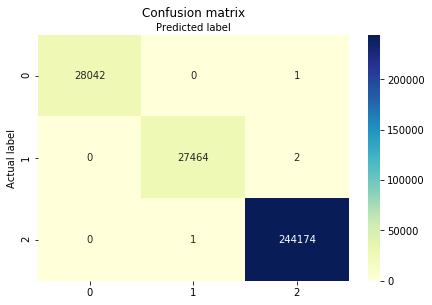

In [112]:
class_names=[0,1,2] # name  of classe
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### **Labels**
High-Value = 0 <br>
Mid-Value = 2 <br>
Low-Value = 1 <br>

In [113]:
#I don't know how to get the labels to appear on the graph. If you could please provide some pointers. 

In [114]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred_rf, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     28043
           1      1.000     1.000     1.000     27466
           2      1.000     1.000     1.000    244175

   micro avg      1.000     1.000     1.000    299684
   macro avg      1.000     1.000     1.000    299684
weighted avg      1.000     1.000     1.000    299684



In [115]:
def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []
    for transformer_in_columns in column_transformer.transformers_[:-1]:#the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1],Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names()
        except AttributeError: # if no 'get_feature_names' function, use raw column name
            names = raw_col_name
        if isinstance(names,np.ndarray): # eg.
            col_name += names.tolist()
        elif isinstance(names,list):
            col_name += names    
        elif isinstance(names,str):
            col_name.append(names)
    return col_name

In [116]:
full_col_names = get_column_names_from_ColumnTransformer(preprocessor)

## Understaning Our Feature Importance

In [117]:
print('Total number of features in the model: {}'.format(len(clf_rf.steps[1][1].feature_importances_)))

Total number of features in the model: 2221


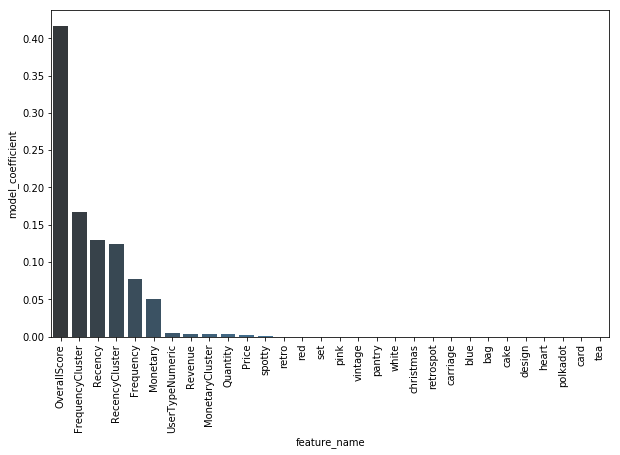

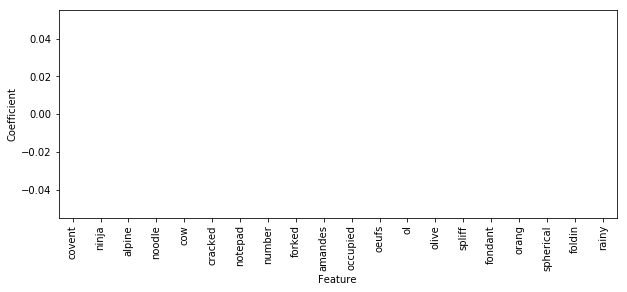

In [118]:
logReg_coeff = pd.DataFrame({'feature_name': full_col_names, 'model_coefficient': clf_rf.steps[1][1].feature_importances_.transpose().flatten()})
logReg_coeff = logReg_coeff.sort_values('model_coefficient',ascending=False)
logReg_coeff_top = logReg_coeff.head(30)
logReg_coeff_bottom = logReg_coeff.tail(20)
# Plot top 5 coefficients
plt.figure().set_size_inches(10, 6)
fg3 = sns.barplot(x='feature_name', y='model_coefficient',data=logReg_coeff_top, palette="Blues_d")
fg3.set_xticklabels(rotation=90, labels=logReg_coeff_top.feature_name)
# Plot bottom 5 coefficients
plt.figure().set_size_inches(10,6)
fg4 = sns.barplot(x='feature_name', y='model_coefficient',data=logReg_coeff_bottom, palette="GnBu_d")
fg4.set_xticklabels(rotation=90, labels=logReg_coeff_bottom.feature_name)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.subplots_adjust(bottom=0.4)


# 6 - Product Description & Customer Segment Analysis 

We'd like to answer our hypothesis to determine if the products have any importance based on the customer segment. <br>
In order to analyze this we will check  each  customer order for any of the words from the top 10 features in **Description**.

In [119]:
description = logReg_coeff.sort_values('model_coefficient',ascending=False)
description_top = description.head(600)
description_top=list(description_top['feature_name'][11:21])
df_description_top = df_logreg[['CustomerID','Description','Country','Segment']]
df_description_top["Description"] = df_description_top["Description"].str.lower()
df_description_top.head()

,CustomerID,Description,Country,Segment
0,14590.0,retro spot mug,United Kingdom,Low-Value
1,14590.0,retro spot large milk jug,United Kingdom,Low-Value
2,14590.0,new england ceramic cake server,United Kingdom,Low-Value
3,14590.0,hand open shape gold,United Kingdom,Low-Value
4,14590.0,retro spot traditional teapot,United Kingdom,Low-Value


In [120]:
print('The top 10 words in our feature extraction are: {}'.format(description_top))

The top 10 words in our feature extraction are: ['spotty', 'retro', 'red', 'set', 'pink', 'vintage', 'pantry', 'white', 'christmas', 'retrospot']


In [121]:
df_description_top['TopFeature']=np.where(df_description_top['Description'].apply(lambda x: any([k in x for k in description_top])),'Yes','No')

In [122]:
df_description_top.head()

,CustomerID,Description,Country,Segment,TopFeature
0,14590.0,retro spot mug,United Kingdom,Low-Value,Yes
1,14590.0,retro spot large milk jug,United Kingdom,Low-Value,Yes
2,14590.0,new england ceramic cake server,United Kingdom,Low-Value,No
3,14590.0,hand open shape gold,United Kingdom,Low-Value,No
4,14590.0,retro spot traditional teapot,United Kingdom,Low-Value,Yes


In [123]:
df_description_top['SegmentNumeric'] = labelencoder.fit_transform(df_description_top['Segment'])
df_description_top['TopFeatureNumeric'] = labelencoder.fit_transform(df_description_top['TopFeature'])

In [124]:
df_description_top.corr()

,CustomerID,SegmentNumeric,TopFeatureNumeric
CustomerID,1.000000,-0.088729,-0.015665
SegmentNumeric,-0.088729,1.000000,-0.006335
TopFeatureNumeric,-0.015665,-0.006335,1.000000


In [125]:
df_description_top_pivot =  pd.pivot_table(data =df_description_top, values = 'CustomerID', index = 'Segment', columns = 'TopFeature', aggfunc = lambda x: len(x))

In [136]:
df_description_top_pivot=df_description_top_pivot.reindex(['High-Value','Mid-Value','Low-Value'], axis=0)
df_description_top_pivot=df_description_top_pivot.reindex(['Yes','No'], axis=1)
df_description_top_pivot

TopFeature,Yes,No
Segment,,
High-Value,28323.0,41837.0
Mid-Value,238919.0,371706.0
Low-Value,26694.0,41729.0


High Value : Yes =  40.369% | No = 59.631%<br>
Mid Value :  Yes = 39.127% | No = 60.873%<br>
Low Value : Yes = 39.013% | No = 60.987%%<br>

### Findings: 
- From this analysis we can conclude that by a small degree our high value customers do purchase products in our top features, but I do not believe that this is a significant enough value to provide this analysis to the marketing team to market certain products. 

# 7 - Conclusion

In conclusion we've identified the following: 
- The Online Retailer should be focusing more on retention and providing better service to their higher value customers. This can now be completed more efficiently and effectively with newly formed customer segments groups. 
- We have created a Random Forrest Classifier with a high accuracy, precision, and recall in order to predict future customer segment. It is important to investigate further why the accuracy is so high in this model. Currently, I believe it is due to the imbalance of the customer clusters. 
- Currently, our findings do not show a high enough percentage of users that do purchase our products extracted from our features in our model. That would mean that we fail to reject our null hypothesis.  


## Reference: <br>
    1) https://github.com/scikit-learn/scikit-learn/issues/12525
    2) https://towardsdatascience.com/data-driven-growth-with-python-part-2-customer-segmentation-5c019d150444